In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# Python standard library imports
from typing import Self, Any
from random import sample

In [3]:
from numpy import ndarray

In [4]:
from matplotlib.pyplot import subplots, show

In [5]:
from keras.datasets.cifar10 import load_data as load_cifar10

In [6]:
# model building imports
from keras import Model, Sequential, Input

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import LeakyReLU
from keras.ops import add
from keras.utils import to_categorical

In [ ]:
# model training imports
# from keras.optimizers import SGD
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy, AUC, F1Score
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler

<div class="alert alert-block alert-info" style="color: white; background-color: rgb(61, 191, 206); border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">

### **CIFAR-10 Image Classification with CNN**

</div>

- **Shape** : (32, 32, 3) - tensor
- **Classes** : 10 

1. Convolutional Neural Network (CNN) is used for image classification.
2. Non-linear activation layer
3. MaxPooling

**1 + 2 + 3 = Convolutional Block** $\rightarrow$ $(16, 16, 3 \times nºfilters)$    

**1.1 + 2.1 + 3.1 = Convolutional Block** $\rightarrow$ $(8, 8, 3 \times nºfilters)$

4. Flatten [...]  $\rightarrow$ (d, )-tensor

5. Dense Layer (Fully Connected Layer) $\rightarrow$ (d, nºclasses )-tensor

6. Activation function: ***Softmax*** (em cada valor do vetor)

<center>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg" height="500" />

<br><br>

<img src="https://www.researchgate.net/publication/357227156/figure/fig1/AS:1112913834196995@1642350743618/Schematics-for-the-structures-of-deep-learning-algorithms-A-Neural-network-of-FCN-with.png" height="500" />

</center>



In [8]:
# CIFAR-10

# specify input_shape and number of classes
input_shape = (32, 32, 3) # RGB
n_classes = 10

# 0. airplane
# 1. car
# 2. bird
# 3. cat
# 4. deer
# 5. dog
# 6. frog
# 7. horse
# 8. ship
# 9. truck

In [9]:
# get a sample images dataset
(X_train, y_train), (X_test, y_test) = load_cifar10()

In [10]:
def show_image(array: ndarray) -> None:
    """
    Prints image encoded as a numpy array (uint8)
    """

    figure, axis = subplots(frameon=False)
    axis.imshow(array, aspect="equal")
    axis.set_axis_off()
    show()

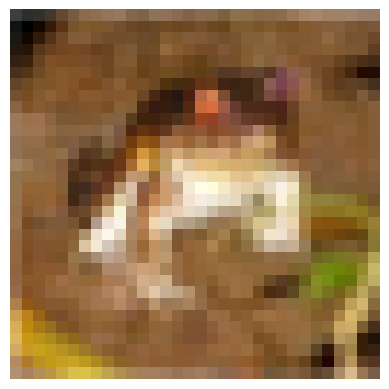

In [11]:
# Show example
train_idx = 0
train_example = X_train[train_idx]
show_image(train_example)

In [12]:
y_train[0]

array([6], dtype=uint8)

In [13]:
def normalize(array: ndarray) -> ndarray:
    """
    Converts the type of an ndarray to float32 and normalizes over the pixel
    range of values
    """

    return array.astype("float32") / 255.0

<div class="alert alert-block alert-info" style="color: white; background-color: rgb(61, 191, 206); border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">

### **Normalization**

</div>


- $(32, 32, 3)$ | int 8 - [0, 255] **$\rightarrow$ [0, 1] | float32**


In [14]:
# for the sake of your precious RAM, sample the training and test set
# plus, normalize the images and convert the ys to one-hot
n_train, n_test = 1024, 128

train_idxs = sample(range(len(X_train)), k=n_train)
X_train = normalize(X_train[train_idxs])
y_train = to_categorical(y_train[train_idxs], n_classes)

test_idxs = sample(range(len(X_test)), k=n_test)
X_test = normalize(X_test[test_idxs])
y_test = to_categorical(y_test[test_idxs], n_classes)

In [15]:
# The 3 ways to build a deep learning model with keras:

In [16]:
# by calling Sequential:
model = Sequential(
    layers = [
        Input(shape=input_shape),
        Conv2D(filters=3 * 8, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=3 * 16, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        # input size is infered
        Dense(n_classes, activation="softmax"),
    ],
    name = "my_tiny_sequential_cnn"
)

model.summary()

Model: "my_tiny_sequential_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 48)     │        10,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1728)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        17,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,378 (110.85 KB)

 Trainable params: 28,378 (110.85 KB)

 Non-trainable params: 0 (0.00 B)

<div class="alert alert-block alert-info" style="color: white; background-color: rgb(61, 191, 206); border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">

### **Keras Model**

</div>

-**`None`** : batch size is not fixed and can be changed

- **Filters**: Keras `n_filters` will be the last shape of the output tensor.


In [17]:
def get_my_tiny_functional_cnn() -> Model:
    """
    Constructs "my_tiny_functional_cnn"
    """

    conv_layer_1 = Conv2D(
        filters=3 * 8,
        kernel_size=(3, 3),
        activation="relu",
        name="conv_layer_1"
    )
    max_pool_layer_1 = MaxPooling2D(pool_size=(2, 2), name="max_pool_layer_1")

    conv_layer_2 = Conv2D(
        filters=3 * 16,
        kernel_size=(3, 3),
        name="conv_layer_2"
    )
    act_layer_2 = LeakyReLU(negative_slope=0.3, name="act_layer_2")
    max_pool_layer_2 = MaxPooling2D(pool_size=(2, 2), name="max_pool_layer_2")

    flatten_layer = Flatten(name="flatten_layer")
    dense_layer = Dense(
        n_classes,
        activation="softmax",
        name="classification_head"
    )


    inputs = Input(shape=input_shape)
    x = inputs

    x = conv_layer_1(x)
    x = max_pool_layer_1(x)

    x = conv_layer_2(x)
    x = act_layer_2(x)
    x = max_pool_layer_2(x)

    x = flatten_layer(x)
    x = dense_layer(x)

    outputs = x

    return Model(inputs=inputs, outputs=outputs, name="my_tiny_functional_cnn")

In [18]:
model = get_my_tiny_functional_cnn()
model.summary()

Model: "my_tiny_functional_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv2D)           │ (None, 30, 30, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_layer_1 (MaxPooling2D) │ (None, 15, 15, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv2D)           │ (None, 13, 13, 48)     │        10,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ act_layer_2 (LeakyReLU)         │ (None, 13, 13, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_layer_2 (MaxPooling2D) │ (None, 6, 6, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_layer (Flatten)         │ (None, 1728)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head (Dense)     │ (None, 10)             │        17,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,378 (110.85 KB)

 Trainable params: 28,378 (110.85 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class MyTinyCNN(Model):
    """
    MyTinyCNN class, inherets from keras' Model class
    """

    def __init__(self: Self, activation: str = "relu") -> None:
        """
        Initialization
        """

        super().__init__(name="my_tiny_oo_cnn")

        self.conv_layer_1 = Conv2D(
            filters=3 * 8,
            kernel_size=(3, 3),
            activation=activation,
            name="conv_layer_1"
        )
        self.max_pool_layer_1 = MaxPooling2D(
            pool_size=(2, 2),
            name="max_pool_layer_1"
        )

        # exemplify non-sequential nature of computation possible with
        # the functional and object-oriented methods
        self.conv_layer_2l = Conv2D(
            filters=3 * 16,
            kernel_size=(3, 3),
            activation=activation,
            name="conv_layer_2l",
            padding="same"
        )
        self.conv_layer_2r = Conv2D(
            filters=3 * 16,
            kernel_size=(2, 2),
            activation=activation,
            name="conv_layer_2r",
            padding="same"
        )
        self.max_pool_layer_2 = MaxPooling2D(
            pool_size=(2, 2),
            name="max_pool_layer_2"
        )

        self.flatten_layer = Flatten(name="flatten_layer")
        self.dense_layer = Dense(
            n_classes,
            activation="softmax",
            name="classification_head"
        )

    def call(self: Self, inputs: Any) -> Any:
        """
        Forward call
        """

        x = inputs

        x = self.conv_layer_1(x)
        x = self.max_pool_layer_1(x)

        # exemplify non-sequential nature of computation possible with
        # the functional and object-oriented methods
        x_l = self.conv_layer_2l(x)
        x_r = self.conv_layer_2r(x)
        x = add(x_l, x_r)
        x = self.max_pool_layer_2(x)

        x = self.flatten_layer(x)

        return  self.dense_layer(x)

In [ ]:
# no output shape and number of parameters specified, why?
model = MyTinyCNN()
model.summary()

# inputs = Input(shape=input_shape)
# _ = model.call(inputs)
# model.summary()

Model: "my_tiny_oo_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_layer_1 (Conv2D)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_layer_1 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2l (Conv2D)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2r (Conv2D)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_layer_2 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_layer (Flatten)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head (Dense)     │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Now let's train our MyTinyCNN:

In [22]:
epochs = 32
batch_size = 16

In [23]:
# What do we need? Model, optimizer, loss (at least)
model = MyTinyCNN()
optimizer = SGD(learning_rate=0.01, name="optimizer")
loss = CategoricalCrossentropy(name="loss")

# metrics
categorical_accuracy = CategoricalAccuracy(name="accuracy")
auc = AUC(name="auc")
f1_score = F1Score(average="macro", name="f1_score")
metrics = [categorical_accuracy, auc, f1_score]

# traces the computation
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [24]:
# train the model
_ = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2
)

Epoch 1/32


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.1004 - auc: 0.4963 - f1_score: 0.0630 - loss: 2.3093 - val_accuracy: 0.1122 - val_auc: 0.5761 - val_f1_score: 0.0541 - val_loss: 2.2712
Epoch 2/32
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1366 - auc: 0.5731 - f1_score: 0.0820 - loss: 2.2752 - val_accuracy: 0.1122 - val_auc: 0.6124 - val_f1_score: 0.0567 - val_loss: 2.2538
Epoch 3/32
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1420 - auc: 0.6153 - f1_score: 0.1079 - loss: 2.2579 - val_accuracy: 0.1561 - val_auc: 0.6737 - val_f1_score: 0.1089 - val_loss: 2.2112
Epoch 4/32
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2121 - auc: 0.6572 - f1_score: 0.1551 - loss: 2.2168 - val_accuracy: 0.1707 - val_auc: 0.6944 - val_f1_score: 0.1415 - val_loss: 2.1861
Epoch 5/32
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2190 - auc: 0.6982 - f1_score: 0.1757 - loss: 2.1597 - val_accuracy: 0.2390 - val_auc: 0.7118 - val_f1_score: 0.1728 - val_loss: 2.1130
Epoch 

In [25]:
# evaluate on the test set
model.evaluate(
    X_test,
    y_test,
    batch_size=batch_size,
    return_dict=True,
    verbose=0
)

{'accuracy': 0.40625,
 'auc': 0.7808701992034912,
 'f1_score': 0.3668270707130432,
 'loss': 1.9205697774887085}

In [26]:
# predict on an example
test_idx = 0
test_example = X_test[test_idx : test_idx + 1]
true_test_example_class = y_test[test_idx]
true_test_example_class

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
int(true_test_example_class.argmax())

1

In [28]:
test_example_probs = model.predict(test_example, verbose=0)
test_example_probs

array([[5.1102545e-02, 7.9792120e-02, 1.9300796e-02, 2.4581226e-02,
        2.3301435e-03, 4.9092229e-03, 4.8309675e-04, 5.8876064e-02,
        1.8692419e-01, 5.7170057e-01]], dtype=float32)

In [29]:
int(test_example_probs.argmax())

9

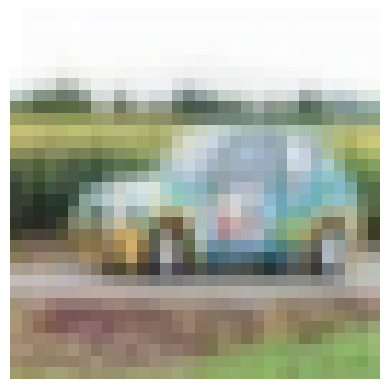

In [30]:
show_image(test_example[0])

In [31]:
# Next class:
# Regularization

---